In [1]:
import random
from math import exp,log
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y = np.array([0,0,0,1])

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
    
    def sigmoid(self,z):
        return 1/(1+exp(-z))

    def predict(self,x):
        z = np.inner(self.w,x) + self.b[0]
        a = self.sigmoid(z)
        return a

In [4]:
model = logistic_regression_model()

In [5]:
def train(X,Y,model,lr):
    dw0 = 0.0
    dw1 = 0.0
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
            
        x = np.append(x,1)
        [dw0,dw1,db] = [dw0,dw1,db] + ((a-y)*x)
        
    cost /= m
    model.w[0] -= lr * dw0/m
    model.w[1] -= lr * dw1/m
    model.b[0] -= lr * db/m
    
    return cost

In [6]:
def loss():
    loss_ = []
    for i in range(4):
        loss = -Y[i]*log(model.predict(X[i]))-(1-Y[i])*log(1-model.predict(X[i]))
        loss_.append(loss)
    return loss_

In [7]:
cost1 = []
epoch_ = []
for epoch in range(10000):
    cost = train(X,Y,model,0.1)
    cost1.append(cost)
    epoch_.append(epoch)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 1.453389753370658
500 0.24718763368208507
1000 0.14999727899252369
1500 0.10777154334966987
2000 0.08377744520859934
2500 0.06833183296511378
3000 0.057587606577738995
3500 0.04969996743812469
4000 0.04367380026073893
4500 0.03892583837325355
5000 0.035092144733550296
5500 0.0319342055335516
6000 0.029289373796073083
6500 0.027043036044853766
7000 0.025112164933334048
7500 0.023435179651760816
8000 0.021965466448958495
8500 0.02066710824700457
9000 0.019511993607095816
9500 0.018477812826403813


In [8]:
model.predict([0,0])

1.273520008557603e-05

In [9]:
model.predict([0,1])

0.020389486415883975

In [10]:
model.predict([1,0])

0.020389447195379207

In [11]:
model.predict([1,1])

0.9714422845841921

In [12]:
loss1 = loss()
loss1

[1.27352811789498e-05,
 0.020600181397202308,
 0.02060022143403686,
 0.028973420489161718]

In [13]:
model = logistic_regression_model()

In [14]:
cost2 = []
for epoch in range(10000):
    cost = train(X,Y,model,0.01)
    cost2.append(cost)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.7654726578941731
500 0.6127137221385365
1000 0.5146763864313724
1500 0.44488099370247625
2000 0.3930153268345467
2500 0.35301503584691685
3000 0.3211529715144772
3500 0.29508086207849205
4000 0.2732708976399624
4500 0.25469459898470104
5000 0.23863662108461475
5500 0.22458430272812863
6000 0.2121602574271316
6500 0.2010799967991378
7000 0.19112451447368028
7500 0.18212206394023195
8000 0.17393574129727224
8500 0.16645482782789572
9000 0.15958862637533505
9500 0.15326198857071782


In [15]:
model.predict([0,0])

0.00913104188805875

In [16]:
model.predict([0,1])

0.15347400479126647

In [17]:
model.predict([1,0])

0.15326554119750632

In [18]:
model.predict([1,1])

0.7807560355726909

In [19]:
loss2 = loss()
loss2

[0.009172985371408933,
 0.16636814139128778,
 0.16661436883293096,
 0.2474925523682772]

In [20]:
model = logistic_regression_model()

In [21]:
cost3 = []
for epoch in range(10000):
    cost = train(X,Y,model,0.001)
    cost3.append(cost)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.9117369044765076
500 0.8258801162174126
1000 0.7606342967214207
1500 0.7109881190637015
2000 0.6727964958659541
2500 0.6428677025494808
3000 0.6188530549378091
3500 0.59907097718267
4000 0.5823358975425009
4500 0.5678181296998603
5000 0.5549383037943505
5500 0.5432912853274144
6000 0.5325926502220515
6500 0.5226414998349911
7000 0.5132947796245444
7500 0.504449578157952
8000 0.4960309241337264
8500 0.4879833621316229
9000 0.48026512578888525
9500 0.4728440990233205


In [22]:
model.predict([0,0])

0.2123784985616259

In [23]:
model.predict([0,1])

0.22012651949070045

In [24]:
model.predict([1,0])

0.4400814142876931

In [25]:
model.predict([1,1])

0.45137583719252145

In [26]:
loss3 = loss()
loss3

[0.238737632642655, 0.5799638884786198, 0.2486235769303253, 0.7954549446257336]

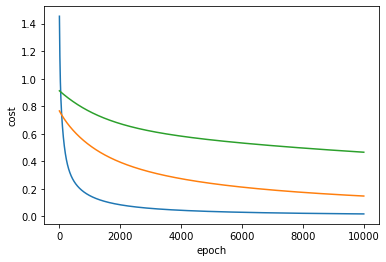

In [27]:
plt.plot(epoch_,cost1)
plt.plot(epoch_,cost2)
plt.plot(epoch_,cost3)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

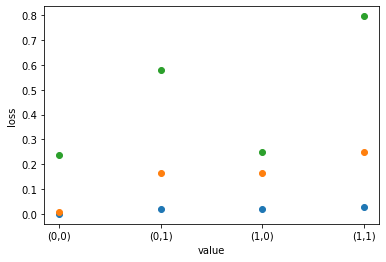

In [28]:
test = ["(0,0)","(0,1)","(1,0)","(1,1)"]
plt.plot(test,loss1,'o')
plt.plot(test,loss2,'o')
plt.plot(test,loss3,'o')
plt.xlabel("value")
plt.ylabel("loss")
plt.show()